<a href="https://colab.research.google.com/github/aiswarya-joseph-08/Project-of-ML/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The automotive industry generates vast amounts of data related to car specifications, features, and pricing. However, accurately estimating a car’s price based on its characteristics remains a challenge due to multiple influencing factors such as brand, engine capacity, fuel type, mileage, transmission type, and manufacturing year. This project aims to develop a machine learning model that predicts car prices using historical car data. By analyzing various technical and market-related attributes, the model will identify key factors that significantly impact pricing. The objective is to build a reliable and accurate predictive system that assists buyers, sellers, and dealerships in making informed pricing decisions. The final model will be evaluated using appropriate performance metrics to determine its accuracy and effectiveness in real-world applications


# Column Name         -       Description                                     

model – The specific model name of the car (e.g., A1, A3, A4).

year – The manufacturing year of the vehicle.

price – The selling price of the car (Target Variable).

transmission – Type of transmission used (Manual or Automatic).

mileage – Total distance the car has traveled (in miles).

fuelType – Type of fuel used by the car (Petrol, Diesel, etc.).

tax – Road tax applied to the vehicle.

mpg – Miles per gallon; indicates fuel efficiency.

engineSize – Engine capacity of the car (in liters).

Make – Brand/manufacturer of the vehicle (e.g., Audi).     


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/cars_dataset.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
Make,0


In [ ]:
df.duplicated().sum()

np.int64(842)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

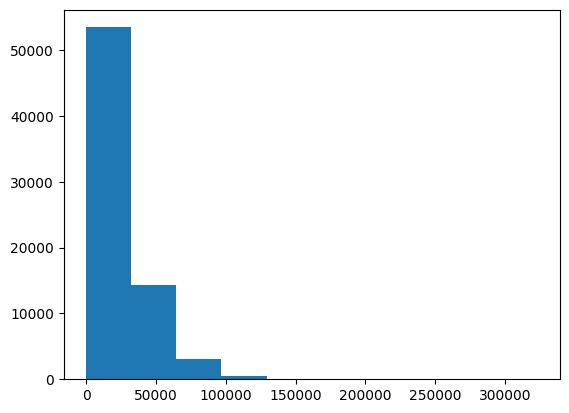

In [ ]:
plt.hist(df['mileage'])
plt.show()

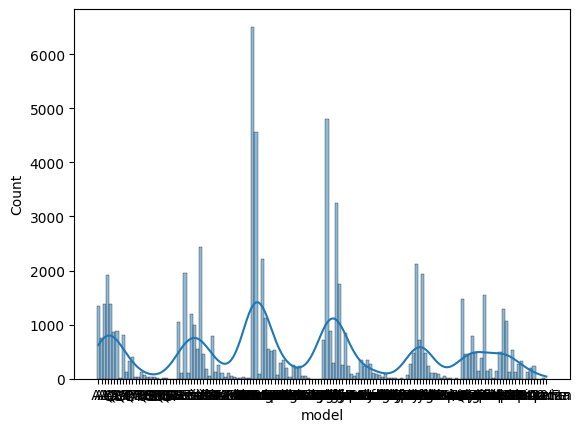

In [ ]:
sns.histplot(df['model'],kde=True)
plt.show()

<Axes: >

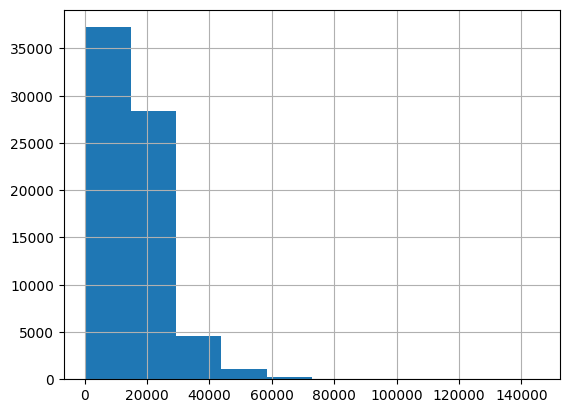

In [ ]:
df["price"].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71593 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         71593 non-null  object 
 1   year          71593 non-null  int64  
 2   price         71593 non-null  int64  
 3   transmission  71593 non-null  object 
 4   mileage       71593 non-null  int64  
 5   fuelType      71593 non-null  object 
 6   tax           71593 non-null  float64
 7   mpg           71593 non-null  float64
 8   engineSize    71593 non-null  float64
 9   Make          71593 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 6.0+ MB


In [ ]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' T-Roc'
 ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' California' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos'
 ' Fox' ' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR'
 ' Prius' ' Avensi

In [ ]:
print(df['Make'].unique())

['audi' 'BMW' 'Ford' 'vw' 'toyota' 'skoda' 'Hyundai']


In [ ]:
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


In [ ]:
print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['Make'] = le.fit_transform(df['Make'])
df['model'] = le.fit_transform(df['model'])


In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71593 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         71593 non-null  int64  
 1   year          71593 non-null  int64  
 2   price         71593 non-null  int64  
 3   transmission  71593 non-null  int64  
 4   mileage       71593 non-null  int64  
 5   fuelType      71593 non-null  int64  
 6   tax           71593 non-null  float64
 7   mpg           71593 non-null  float64
 8   engineSize    71593 non-null  float64
 9   Make          71593 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 6.0 MB


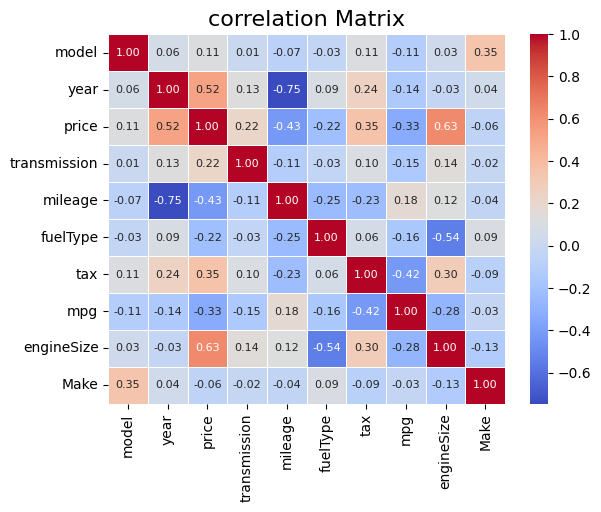

In [ ]:
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size":8}
            )
plt.title('correlation Matrix',fontsize=16)
plt.show()

In [ ]:
df.drop(['engineSize'], axis=1,inplace=True)

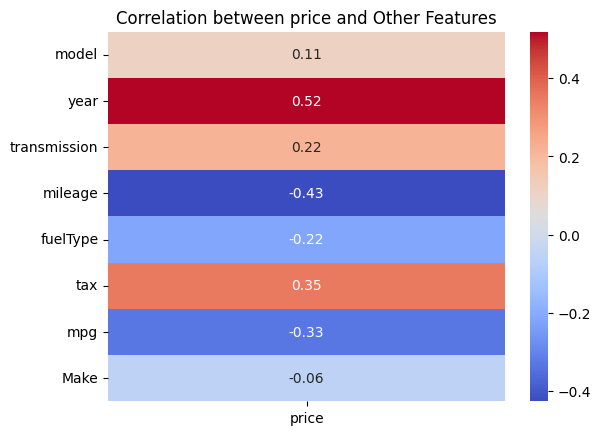

In [ ]:
car_corr = df.corr()['price']

car_corr =car_corr.drop('price')
sns.heatmap(car_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True,annot_kws={'size': 10})
plt.title('Correlation between price and Other Features')
plt.show()

In [ ]:
df.drop(['Make'], axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71593 entries, 0 to 72434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         71593 non-null  int64  
 1   year          71593 non-null  int64  
 2   price         71593 non-null  int64  
 3   transmission  71593 non-null  int64  
 4   mileage       71593 non-null  int64  
 5   fuelType      71593 non-null  int64  
 6   tax           71593 non-null  float64
 7   mpg           71593 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 4.9 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
x=df[['model','year','transmission','mileage','fuelType','tax','mpg']]
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_test,y_test)
print(f'Baseline model accuracy: {score:.2f}')

Baseline model accuracy: 0.48


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'Baseline model R2 score: {r2:.2f}')

Baseline model R2 score: 0.91


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42
)


model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(random_state=42, max_iter=5000))
])


model.fit(xtrain, ytrain)


score = model.score(xtest, ytest)
print("R2 Score:", score)


R2 Score: 0.3857442057293935


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9485439465799522

In [ ]:
from sklearn.model_selection import KFold
x=df.drop('price',axis=1)
y=df['price']

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

best_accuracy=0
best_fold=-1

best_x_train=None
best_y_train=None
best_x_test=None
best_y_test=None
best_y_pred=None

for fold,(train_index,test_index) in enumerate(kf.split(x),1):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  score = model.score(x_test,y_test)
  print(f"fold{fold} Accuracy:{score}")

  if score >best_accuracy:
    best_accuracy=score
    best_fold=fold
    best_x_train=x_train
    best_y_train=y_train
    best_x_test=x_test
    best_y_test=y_test
    best_y_pred=y_pred
print(f"\n best fold:{best_fold} with accuracy:{best_accuracy}")

fold1 Accuracy:0.4814923294642832
fold2 Accuracy:0.46669155424874176
fold3 Accuracy:0.47499157913881007
fold4 Accuracy:0.44833167977005284
fold5 Accuracy:0.4679615704570579

 best fold:1 with accuracy:0.4814923294642832


In [ ]:
model=LinearRegression()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.4814923294642832

In [ ]:
model=RandomForestRegressor()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.9477783207697126

In [ ]:
model = DecisionTreeRegressor()
model.fit(best_x_train,best_y_train)
y_pred = model.predict(best_x_test)
r2 = r2_score(best_y_test, y_pred)
print(f'Baseline model R2 score: {r2:.2f}')

Baseline model R2 score: 0.91


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42
)


model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(random_state=42, max_iter=5000))
])


model.fit(best_x_train,best_y_train)


score = model.score(best_x_test,best_y_test)
print("R2 Score:", score)

R2 Score: 0.38601801151893744


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(7,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(best_x_train,best_y_train,epochs=100,batch_size=32)

Epoch 1/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 98444544.0000
Epoch 2/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 56931172.0000
Epoch 3/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 55038980.0000
Epoch 4/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 40926296.0000
Epoch 5/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 33821644.0000
Epoch 6/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 32071558.0000
Epoch 7/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31102658.0000
Epoch 8/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 29575162.0000
Epoch 9/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 28843928.0000
Epoch 10/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 27949236.0000
Epoch 11/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27694960.0000
Epoch 12/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27866934.0000
Epoch 13/100
1790/1790 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 27635088.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71593 entries, 0 to 72434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         71593 non-null  int64  
 1   year          71593 non-null  int64  
 2   price         71593 non-null  int64  
 3   transmission  71593 non-null  int64  
 4   mileage       71593 non-null  int64  
 5   fuelType      71593 non-null  int64  
 6   tax           71593 non-null  float64
 7   mpg           71593 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 4.9 MB


In [ ]:
from sklearn.metrics import r2_score

loss = model.evaluate(best_x_test, best_y_test)
y_pred_nn = model.predict(best_x_test)
r2_nn = r2_score(best_y_test, y_pred_nn)

print(f"Neural Network Model Loss: {loss:.2f}")
print(f"Neural Network Model R2 score: {r2_nn:.2f}")

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26248556.0000
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
Neural Network Model Loss: 19886624.00
Neural Network Model R2 score: 0.77


In [ ]:
import pickle

with open('car model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

with open('car model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
with open('/content/car model.pkl','rb') as file:
  load_model=pickle.load(file)

# Conclusion

In this project, multiple models were built and compared to predict car price using the dataset. Traditional machine learning models and a Deep Learning neural network model were trained and evaluated using R² score and loss metrics.

The Decision Tree Regressor performed the best with an R² score of approximately 0.91, showing that it captured the relationship between features and car price very well. The Linear SVR model showed lower performance with an R² score around 0.38, indicating it was not able to model the data patterns effectively.

The Deep Learning Neural Network model achieved an R² score of approximately 0.77, which is a good performance but still lower than the Decision Tree model. The neural network successfully learned complex feature relationships but may require further tuning (more layers, dropout, hyperparameter tuning) to outperform tree-based models.

Overall, the project demonstrates that while Deep Learning is powerful, for this specific car dataset, the Decision Tree model provided the highest prediction accuracy. The final model was saved using pickle for future use, making it ready for deployment or prediction tasks.